In [1]:
import pandas as pd

In [31]:
customer_data = pd.read_csv("customer_data.csv")
customer_data.columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner',
       'partner_value', 'dependents', 'dependents_value', 'phone_service',
       'internet_service', 'contract_type', 'payment_type', 'monthly_charges',
       'total_charges', 'churn', 'tenure', 'is_female', 'has_churned',
       'has_phone', 'has_phone_num', 'has_internet', 'has_internet_num',
       'has_phone_and_internet', 'service_type', 'partner_dependents',
       'start_date', 'average_monthly_charges', 'matches_monthly_charges',
       'phone_service_desc', 'internet_service_desc', 'contract_desc'],
      dtype='object')

In [20]:
month_to_month = customer_data[customer_data.contract_desc == "Month-to-Month"]
month_to_month.shape

(3875, 30)

### Is there any relationship between churn and phone service?

<AxesSubplot:ylabel='phone_service_desc'>

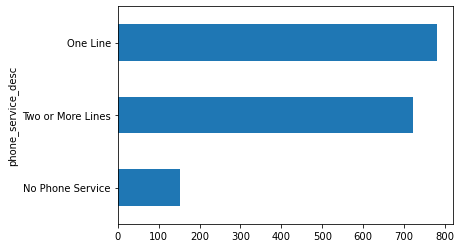

In [25]:
phone_service_churn = month_to_month.groupby("phone_service_desc").has_churned.sum()
phone_service_churn.sort_values().plot.barh()

#### There seems to be very little difference between multiple line and single line customers when it comes to churn.

### Is there any relationship between churn and type of internet service?

<AxesSubplot:ylabel='internet_service_desc'>

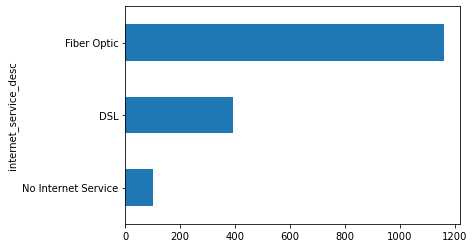

In [27]:
internet_service_churn = month_to_month.groupby("internet_service_desc").has_churned.sum()
internet_service_churn.sort_values().plot.barh()

#### Much more fiber customers churn than any other category

### How much do fiber customers pay monthly compared to DSL or no internet customers?

In [ ]:
month_to_month['float_charges'] = month_to_month.monthly_charges.str.replace("$", "").astype(float)

In [44]:
internet_charges = month_to_month.groupby("internet_service_desc").float_charges.agg("mean")
internet_charges

internet_service_desc
DSL                    50.219501
Fiber Optic            87.021194
No Internet Service    20.409542
Name: float_charges, dtype: float64

#### There is nearly a $40 difference in monthly charges for fiber customers

### Who makes up month-to-month fiber customers that have churned?

In [47]:
fiber_customers = month_to_month[month_to_month.internet_service_desc == "Fiber Optic"]
fiber_customers.shape

(2128, 31)

In [49]:
churned_fiber_customers = fiber_customers[fiber_customers.has_churned]
churned_fiber_customers.shape

(1162, 31)

In [54]:
churned_fiber_customers.groupby("gender").customer_id.count()

gender
Female    599
Male      563
Name: customer_id, dtype: int64

In [55]:
churned_fiber_customers.groupby("is_senior_citizen").customer_id.count()

is_senior_citizen
0    794
1    368
Name: customer_id, dtype: int64

In [56]:
churned_fiber_customers.groupby("partner").customer_id.count()

partner
No     744
Yes    418
Name: customer_id, dtype: int64

In [57]:
churned_fiber_customers.groupby("dependents").customer_id.count()

dependents
No     997
Yes    165
Name: customer_id, dtype: int64